<a href="https://colab.research.google.com/github/c0lbalt/Deep-Learning-w-PyTorch/blob/main/Simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
#"nn" --> stands for Neural Network, there is a torch library for such apparently.
import torch.nn as nn
import torch.nn.functional as F

In [2]:
#Create a Model Class that inherits nn.Module
class Model(nn.Module):
  #Input Layer (4 Feautres of the Iris Flowers) --> Hidden Layer1 (Number of Neurons) -->
  #Hidden Layer 2 (n) -->
  #output (3 Classes of Iris Flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    #instantiate our nn.Module
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    #Rectified Linear Unit?
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [3]:
#Pick a Manual Seed for randomization
torch.manual_seed(41)
#Create and instance of our model
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [6]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [7]:
#Changed the last column from strings to integers.
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 0.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 0.0)
my_df

<ipython-input-7-b95e8c186b74>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 0.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.0
146,6.3,2.5,5.0,1.9,0.0
147,6.5,3.0,5.2,2.0,0.0
148,6.2,3.4,5.4,2.3,0.0


In [8]:
#Train, Test and Split! Set X, Y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [9]:
#Convert these to numpy arrays
X = X.values
y = y.values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#Train Test Split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [12]:
#Converting X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [13]:
#Converting Y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [14]:
#Setting the Criteria of model to measure the error, or hw far off the predictions are from the data!
criterion = nn.CrossEntropyLoss()
#Choose and Optimizer in this case --> Adam, lr = learning rate (if the error doesn;t go down after a bunch of iterations (eopchs) we should lower the lr.)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [15]:
#Training our Model!
#Epochs? (One run through all the training data in our network)
epoch = 100
losses = []
for i in range(epoch):
  #Go forward and get a prediction
  y_pred = model.forward(X_train) #Attempt to get predicted results

  #Measure the loss/error, it should be high at first
  loss = criterion(y_pred, y_train)

  #We need to keep track of the losses as well.
  losses.append(loss.detach().numpy())

  #Print every 10 epochs to visualize data.
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  #Back Propogation: take the error rate of forward propogation and feed it back
  #through the network to fine tune the weights.
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.111958622932434
Epoch: 10 and loss: 0.49496355652809143
Epoch: 20 and loss: 0.03981165215373039
Epoch: 30 and loss: 0.001986422576010227
Epoch: 40 and loss: 0.00036021825508214533
Epoch: 50 and loss: 0.00016599430819042027
Epoch: 60 and loss: 0.00011908360465895385
Epoch: 70 and loss: 0.00010286340693710372
Epoch: 80 and loss: 9.564101492287591e-05
Epoch: 90 and loss: 9.147161472355947e-05


Text(0.5, 0, 'Epoch')

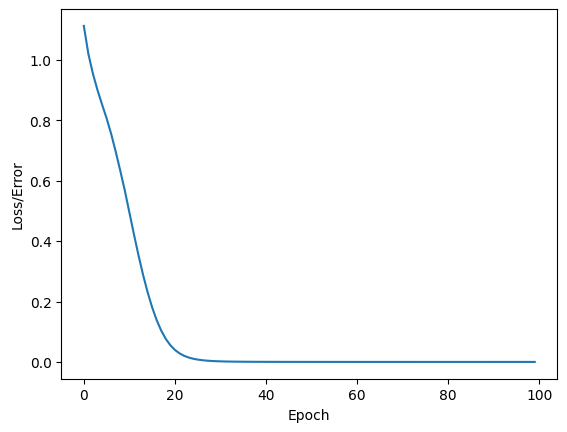

In [16]:
#Graphing out Data
plt.plot(range(epoch), losses)
plt.ylabel('Loss/Error')
plt.xlabel('Epoch')

In [17]:
#Evaluate the Model on Test Data Set (Validation)
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [18]:
loss

tensor(0.0001)

In [19]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = 'Setosa'
    elif y_test[i] == 1:
      x = 'Versicolor'
    elif y_test[i] == 2:
      x = 'Virginica'

    #This will tell us what type of flower class our NN (Neural Network) thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    #Correct? Or Not?
    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f'We got {correct} correct!')

1.)  tensor([ 7.3390, -5.2881, -3.1515]) 	 0 	 0
2.)  tensor([ 8.1190, -5.8880, -3.4754]) 	 0 	 0
3.)  tensor([ 9.1938, -6.7023, -3.9079]) 	 0 	 0
4.)  tensor([ 7.5955, -5.4794, -3.2513]) 	 0 	 0
5.)  tensor([ 8.4335, -6.1239, -3.5994]) 	 0 	 0
6.)  tensor([ 7.3731, -5.3047, -3.1548]) 	 0 	 0
7.)  tensor([ 7.7902, -5.6310, -3.3342]) 	 0 	 0
8.)  tensor([ 7.7204, -5.5760, -3.3038]) 	 0 	 0
9.)  tensor([ 8.1505, -5.9077, -3.4834]) 	 0 	 0
10.)  tensor([ 8.6464, -6.2905, -3.6909]) 	 0 	 0
11.)  tensor([ 7.7731, -5.6196, -3.3291]) 	 0 	 0
12.)  tensor([ 6.1558, -4.3667, -2.6279]) 	 0 	 0
13.)  tensor([ 5.5162, -3.8840, -2.3699]) 	 0 	 0
14.)  tensor([ 6.2464, -4.4471, -2.6970]) 	 0 	 0
15.)  tensor([ 6.2450, -4.4375, -2.6687]) 	 0 	 0
16.)  tensor([ 7.7780, -5.6213, -3.3288]) 	 0 	 0
17.)  tensor([ 5.8561, -4.1371, -2.5149]) 	 0 	 0
18.)  tensor([ 7.5758, -5.4701, -3.2497]) 	 0 	 0
19.)  tensor([ 6.0450, -4.2801, -2.5862]) 	 0 	 0
20.)  tensor([ 5.3718, -3.7814, -2.2995]) 	 0 	 0
21.)  ten

In [20]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [21]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 5.7913, -4.0933, -2.4768])


In [22]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [23]:
with torch.no_grad():
  print(model(newer_iris))

tensor([ 7.6828, -5.5538, -3.2956])


In [24]:
#Save our NN Model
torch.save(model.state_dict(), 'iris_model.pt')

In [25]:
#Load our Saved NN Model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [26]:
#Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)